In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp

In [2]:
data=pd.read_csv("heart.csv")
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [5]:
X=data[["Age","Chol"]]
X

,Age,Chol
0,63,233
1,67,286
2,67,229
3,37,250
4,41,204
...,...,...
298,45,264
299,68,193
300,57,131
301,57,236


In [6]:
X.isnull().sum()

Age     0
Chol    0
dtype: int64

In [7]:
X.describe()

,Age,Chol
count,303.000000,303.000000
mean,54.438944,246.693069
std,9.038662,51.776918
min,29.000000,126.000000
25%,48.000000,211.000000
50%,56.000000,241.000000
75%,61.000000,275.000000
max,77.000000,564.000000


Text(0, 0.5, 'Age')

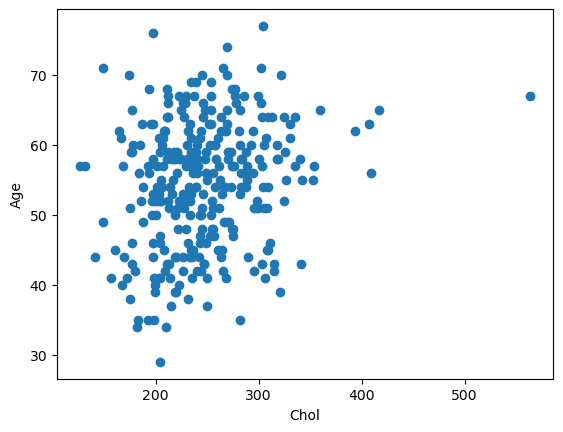

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X.Chol,X.Age)
plt.xlabel("Chol")
plt.ylabel("Age")

In [11]:
from sklearn.preprocessing import StandardScaler

#Converts value as mean =0 sd=1
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 9.48726471e-01, -2.64900304e-01],
       [ 1.39200191e+00,  7.60415190e-01],
       [ 1.39200191e+00, -3.42282606e-01],
       [-1.93256387e+00,  6.39744770e-02],
       [-1.48928843e+00, -8.25921990e-01],
       [ 1.72994457e-01, -2.06863578e-01],
       [ 8.37907612e-01,  4.12194834e-01],
       [ 2.83813316e-01,  2.07591432e+00],
       [ 9.48726471e-01,  1.41356778e-01],
       [-1.59462121e-01, -8.45267566e-01],
       [ 2.83813316e-01, -1.05806889e+00],
       [ 1.72994457e-01,  9.15179793e-01],
       [ 1.72994457e-01,  1.80047929e-01],
       [-1.15683185e+00,  3.15466957e-01],
       [-2.70280980e-01, -9.22649867e-01],
       [ 2.83813316e-01, -1.52236270e+00],
       [-7.13556417e-01, -3.42282606e-01],
       [-4.86432616e-02, -1.48826852e-01],
       [-7.13556417e-01,  5.47613861e-01],
       [-6.02737558e-01,  3.73503683e-01],
       [ 1.05954533e+00, -6.90502963e-01],
       [ 3.94632175e-01,  7.02378464e-01],
       [ 3.94632175e-01,  7.21724040e-01],
       [ 3.

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
model_labels = {}
centroids = {}
i_score = []
s_score = []

for k in range(2, 12):
    model = KMeans(n_clusters=k)
    # model fit
    model = model.fit(X)
    # get the output labels
    labels = model.labels_
    model_labels[k] = labels
    # inertia
    i_score.append(model.inertia_)
    # silhouette
    s_score.append(silhouette_score(X, labels))
    # centroids
    centroids[k] = model.cluster_centers_
    print(f"inertia {model.inertia_} silhouette {silhouette_score(X, labels)}")


C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


inertia 375.5677958695839 silhouette 0.3544023980481436


C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


inertia 256.71535136198975 silhouette 0.3605225716982598


C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


inertia 207.39644261528989 silhouette 0.34578328121612095


C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


inertia 166.28132270673882 silhouette 0.3475356545616124


C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


inertia 138.7799801559568 silhouette 0.3554412482944953


C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


inertia 122.53520467486065 silhouette 0.33491092695656044


C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


inertia 105.91892272194276 silhouette 0.3374919256164935


C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


inertia 93.59493860600345 silhouette 0.3488008319670405


C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


inertia 83.08501463099395 silhouette 0.3511407603877236


C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


inertia 76.37296350251016 silhouette 0.34419853277477797


Text(0.5, 0, 'k')

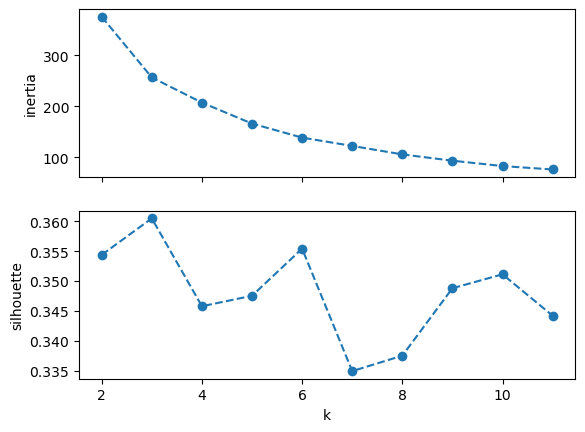

In [16]:
fig,ax=plt.subplots(2,1,sharex=True)
plt.subplot(211)#row,column,plot
plt.plot(range(2,12),i_score,"o--")
plt.ylabel("inertia")
plt.subplot(212)#row,column,plot
plt.plot(range(2,12),s_score,"o--")
plt.ylabel("silhouette")
plt.xlabel("k")

Text(0, 0.5, 'age')

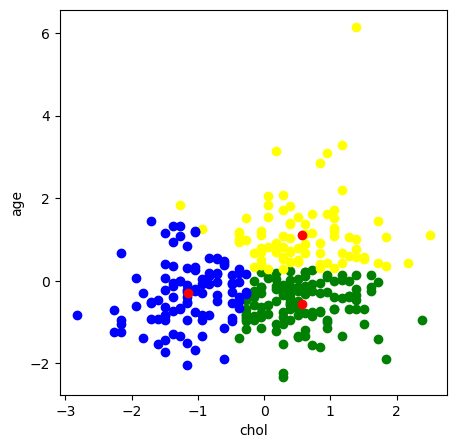

In [17]:
labels=model_labels[3]
centroids=centroids[3]
fig,ax=plt.subplots(figsize=(5,5))
#1st cluster
plt.scatter(X[labels==0,0],X[labels==0,1],c="green",label="cluster1")
#2nd cluster
plt.scatter(X[labels==1,0],X[labels==1,1],c="yellow",label="cluster2")
#3rd cluster
plt.scatter(X[labels==2,0],X[labels==2,1],c="blue",label="cluster3")
#3cluster centroids
plt.scatter(centroids[:,0],centroids[:,1],c="r")
plt.xlabel("chol")
plt.ylabel("age")